# 1. Business Understanding

The comapny wants a prediction model that will enable HR to determine if an employee will leave the company. 

# 2. Data Understanding

- Source: 
- Content:
- Format: The data is in a csv format

The data has rows and columns. The columns are as follows:

- empid : Employee ID
- satisfaction_level
- last_evaluation
- number_projects
- average_monthly_hours
- time_spend_company
- work_accident
- promotion_last_5years
- salary
-left : Whether the employee left or stayed with the company


## 2.1 Data Cleaning

In [102]:
# importing libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from tqdm import tqdm


In [2]:
# loading data

data = pd.read_csv(r'C:\Users\w.selen.KEEMBLT0011\Desktop\Mercy\DataScience\EmployeeChurn\Employee-Churn\data\raw\HR_EmployeeData.csv')

# preview the data

data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [3]:
# checking the shape of the data

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 14999 rows and 10 columns


In [4]:
# checking the data types of the data

data.dtypes

empid                      int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                    object
left                       int64
dtype: object

In [5]:
# checking the statistics of the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
empid,14999.0,7500.000000,4329.982679,1.00,3750.50,7500.00,11249.50,14999.0
satisfaction_level,14997.0,0.612863,0.248634,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


In [6]:
# checking if the data has any missing values

data.isna().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

The column `satisfaction_level` has 2 rows with missing data

In [7]:
# checking the rows with the missing values
data[data['satisfaction_level'].isna()]

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
5,6,NaN,0.50,2,153,3,0,0,low,1
15,16,NaN,0.54,2,143,3,0,0,low,1


- Since the dataset is sizable, these 2 entries can be deleted

In [8]:
# dropping rows with missing values

data.dropna(inplace=True)

In [9]:
print(f'The new dataframe has {data.shape[0]} rows and {data.shape[1]} columns')

The new dataframe has 14997 rows and 10 columns


In [10]:
# checking if the data has any duplicates

print(f'The data has {data.duplicated().sum()} rows with duplicates')

The data has 0 rows with duplicates


In [11]:
# checking the unique values of each column

data.nunique().to_frame('Unique Values')

,Unique Values
empid,14997
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
promotion_last_5years,2
salary,3
left,2


- It can be noted that most columns are categorical.

In [12]:
# checking if the data types of the different columns are correct

data.dtypes


empid                      int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                    object
left                       int64
dtype: object

- The columns all have the correct data types, hence no need to edit

# 3. Exploratory Data Analysis (EDA)

In [13]:
# Set the default text font size

plt.rc('font', size=16)

# Set the axes title font size

plt.rc('axes', titlesize=16)

# Set the axes labels font size

plt.rc('axes', labelsize=16)

# Set the font size for x tick labels

plt.rc('xtick', labelsize=13)

# Set the font size for y tick labels

plt.rc('ytick', labelsize=13)

# Set the legend font size

plt.rc('legend', fontsize=16)

# Set the font size of the figure title

plt.rc('figure', titlesize=20)

# set figsize

plt.rcParams['figure.figsize'] = (10, 8)

sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## 3.1 What is the distribution of those who left

In [14]:
left_df= pd.concat([data['left'].value_counts(),
          data['left'].value_counts(normalize=True)]
          , axis=1
          , keys=['Count', 'Count_percentage'])

left_df

,Count,Count_percentage
0,11428,0.762019
1,3569,0.237981


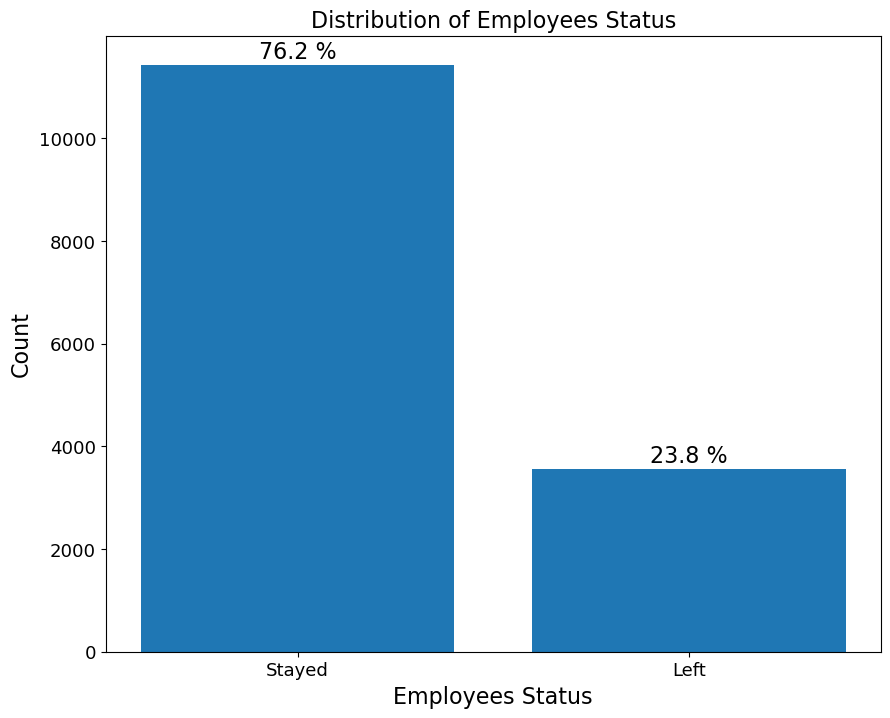

In [15]:
fig, ax = plt.subplots()

bars = ax.bar(height=left_df['Count'], 
              x=left_df.index)

percentages = list(round(left_df['Count_percentage']*100, 1))

ax.bar_label(container=bars, 
             labels=[f'{percentage} %' for percentage in percentages],
             padding=1)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Stayed', 'Left'])

ax.set_title('Distribution of Employees Status')
ax.set_xlabel('Employees Status')
ax.set_ylabel('Count')
plt.show()

- The data is imbalanced. Most of the employees stayed. The ratio of those who stayed to those who left is approximately 3:1

## 3.2 What is the distribution of the salary ranges?

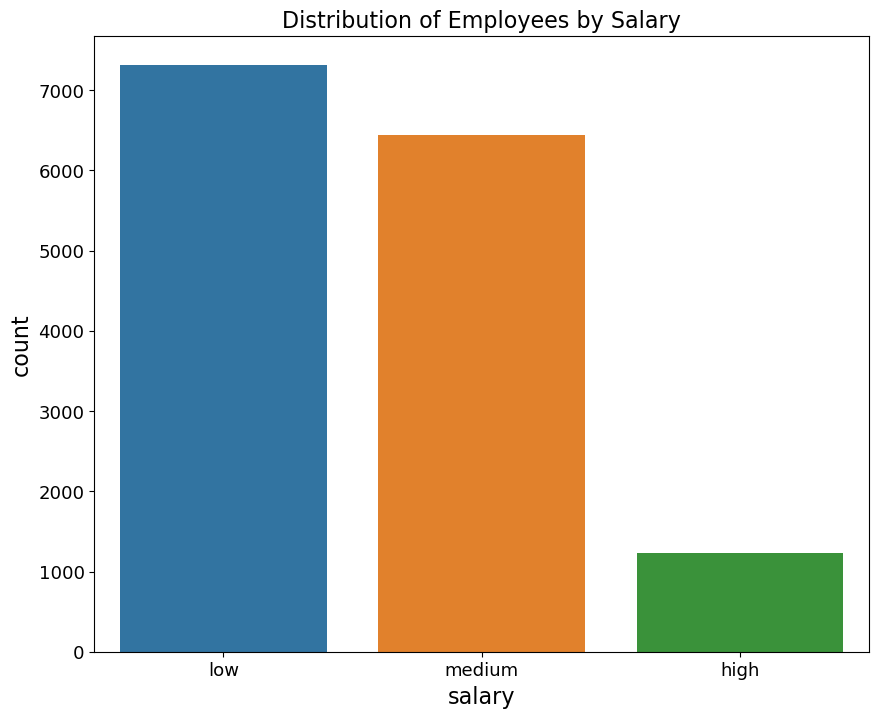

In [16]:
fig, ax = plt.subplots()

bar = sns.countplot(data=data, x='salary')

ax.set_title('Distribution of Employees by Salary')

plt.show()

- Most of the employees earn a low salary, followed by those who earn a medium salary. Those with high salary are very few.

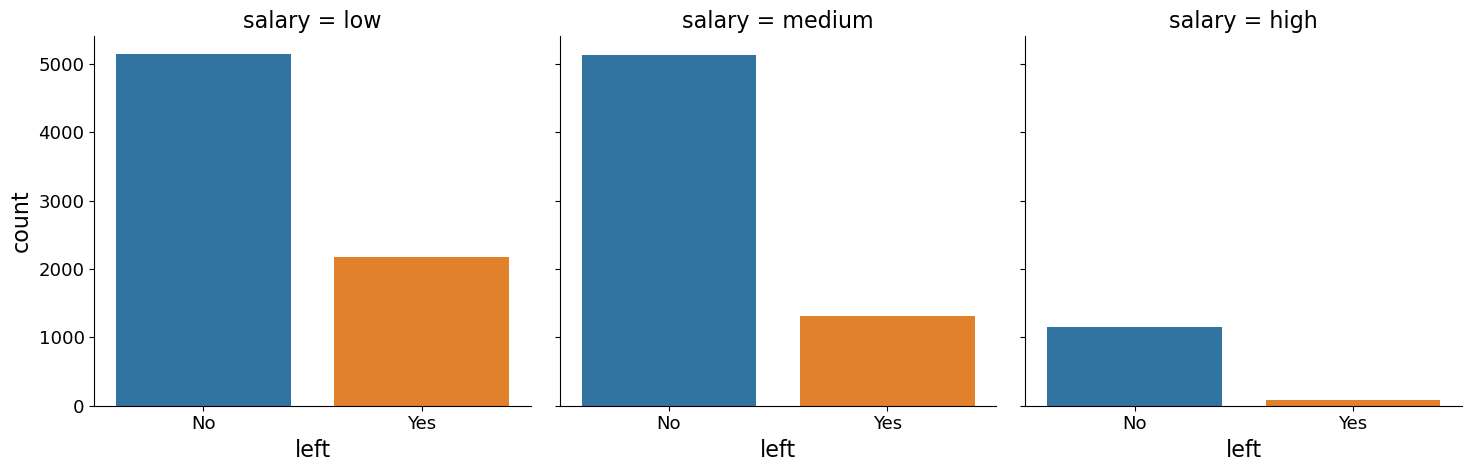

In [17]:
bar = sns.catplot(data=data, 
                  x='left', 
                  col='salary', 
                  kind='count')

bar.set_xticklabels(['No', 'Yes'])
#plt.suptitle('Distribution by Salary Per Employement Status')

plt.show()

- Most of the employees stayed, regardless of the salary

## 3.3 How many people got promotions in the last 5 years?

In [18]:
# creating a dataframe of the data

promotions = pd.concat([data['promotion_last_5years'].value_counts(), 
           data['promotion_last_5years'].value_counts(normalize=True)], 
          axis = 1, 
          keys=['Promotion Count', 'Promotion Percentage'])

promotions

,Promotion Count,Promotion Percentage
0,14678,0.978729
1,319,0.021271


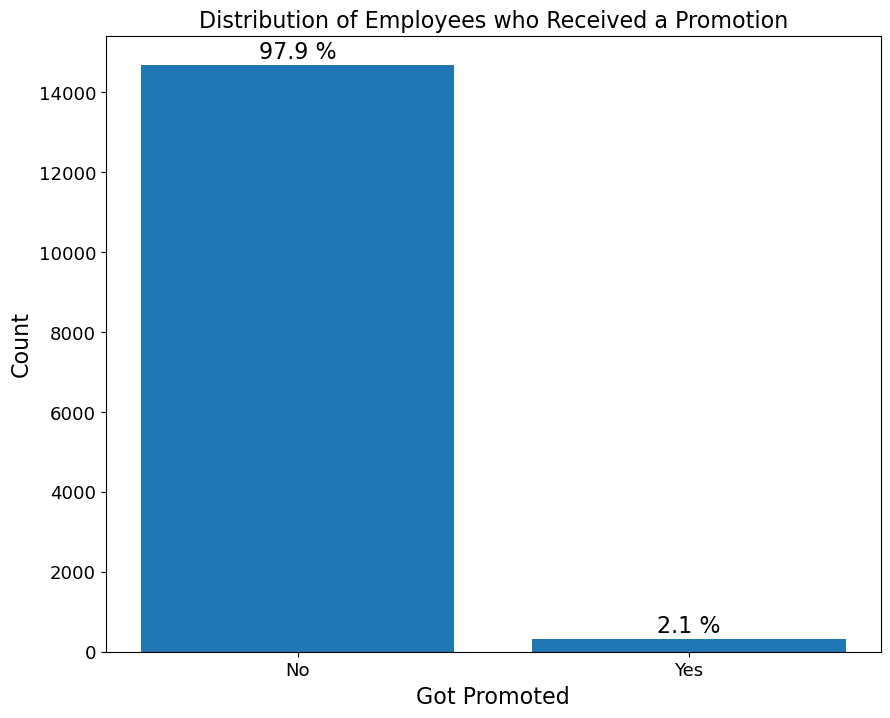

In [19]:
# plotting the data

fig, ax = plt.subplots()

bar = ax.bar(x=promotions.index, 
             height=promotions['Promotion Count'])

percentages = list(round(promotions['Promotion Percentage']*100, 1))

ax.bar_label(container=bar, 
             labels=[f'{percentage} %' for percentage in percentages],
             padding=1)

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Got Promoted')
plt.ylabel('Count')
plt.title('Distribution of Employees who Received a Promotion')

plt.show()

- Very few people got promotions in the last 5 years, only 2% of the employees

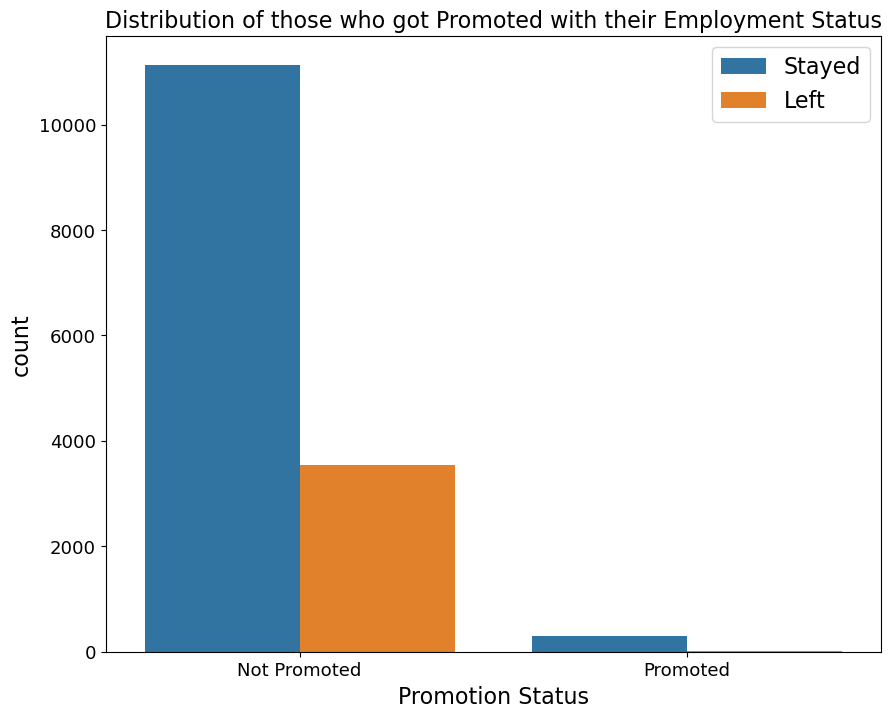

In [20]:
# plotting to see the distribution as by those who left

sns.countplot(data=data, x='promotion_last_5years', hue='left')

plt.title('Distribution of those who got Promoted with their Employment Status')
plt.xticks(ticks=[0,1], 
           labels=['Not Promoted', 'Promoted'])
plt.legend(['Stayed', 'Left'])
plt.xlabel('Promotion Status')

plt.show()

- Most of those who got promted stayed. 

## 3.4 How many people got work related accidents?

In [21]:
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


c:\Users\w.selen.KEEMBLT0011\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


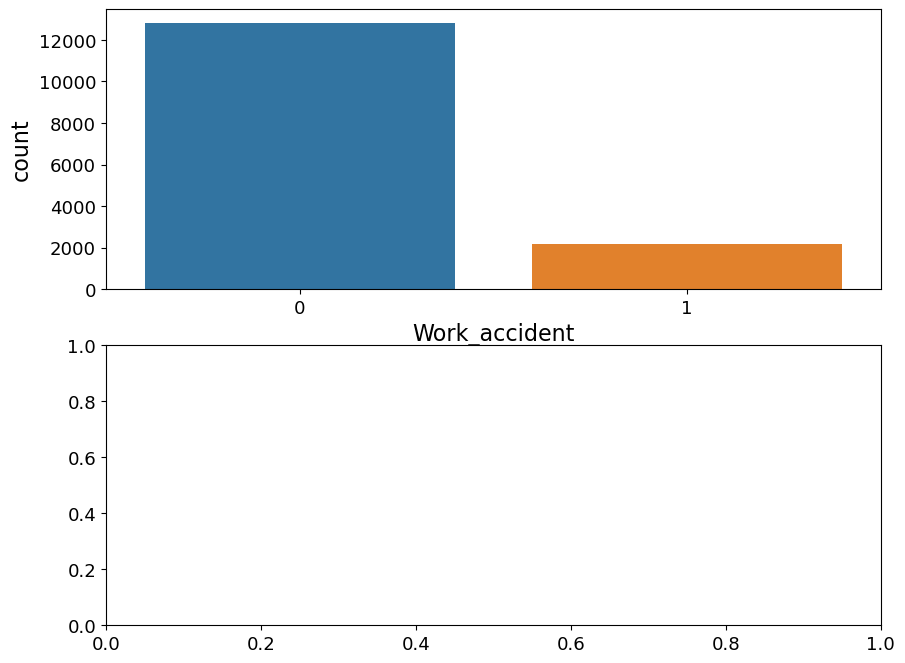

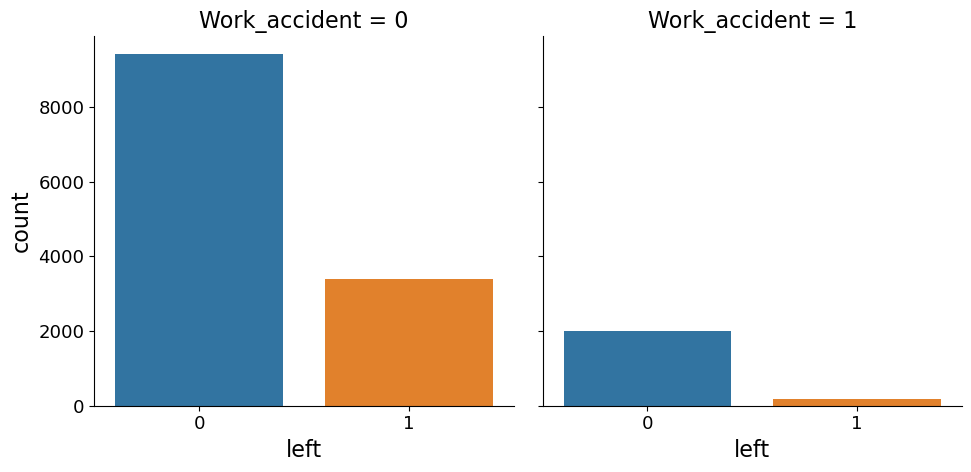

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1)

sns.countplot(data=data,x='Work_accident', ax=axes[0])
sns.catplot(data=data,  x='left', col='Work_accident',kind='count', ax=axes[1])

## 3.5 What is the average satisfaction level of those who leave?

## 3.6 Is there a relationship between number of hours worked monthly and those who leave?

# EDA VIDEO

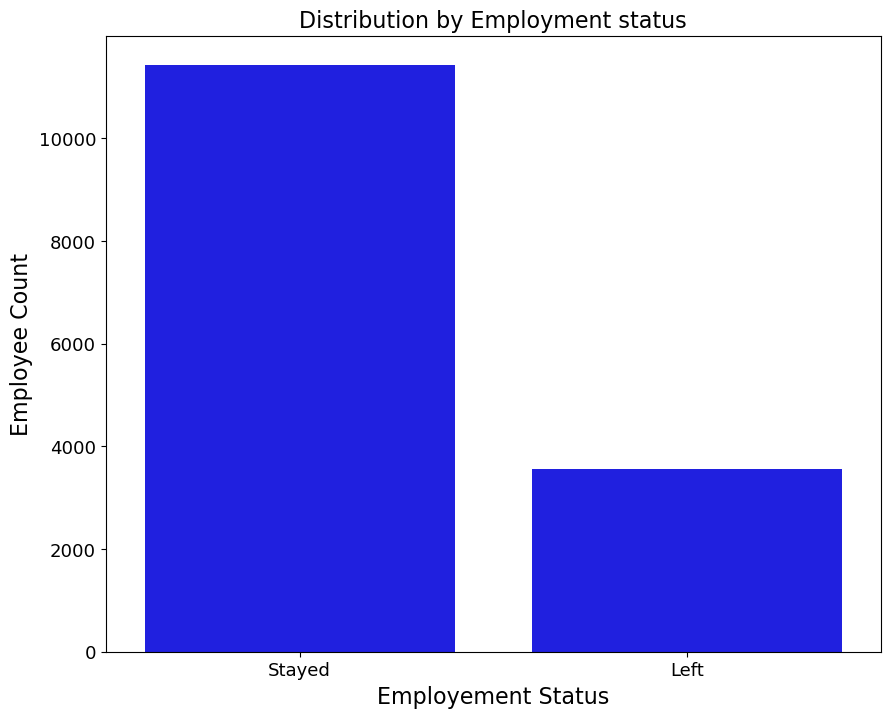

In [23]:
# checking distribution of employees per their employment status

sns.countplot(data=data, x='left', color='blue')

plt.title('Distribution by Employment status')
plt.xticks(ticks=[0,1], labels=['Stayed', 'Left'])
plt.xlabel('Employement Status')
plt.ylabel('Employee Count')

plt.show()

- Most employees stayed.
- Data is imbalanced

In [24]:
data.head(1)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1


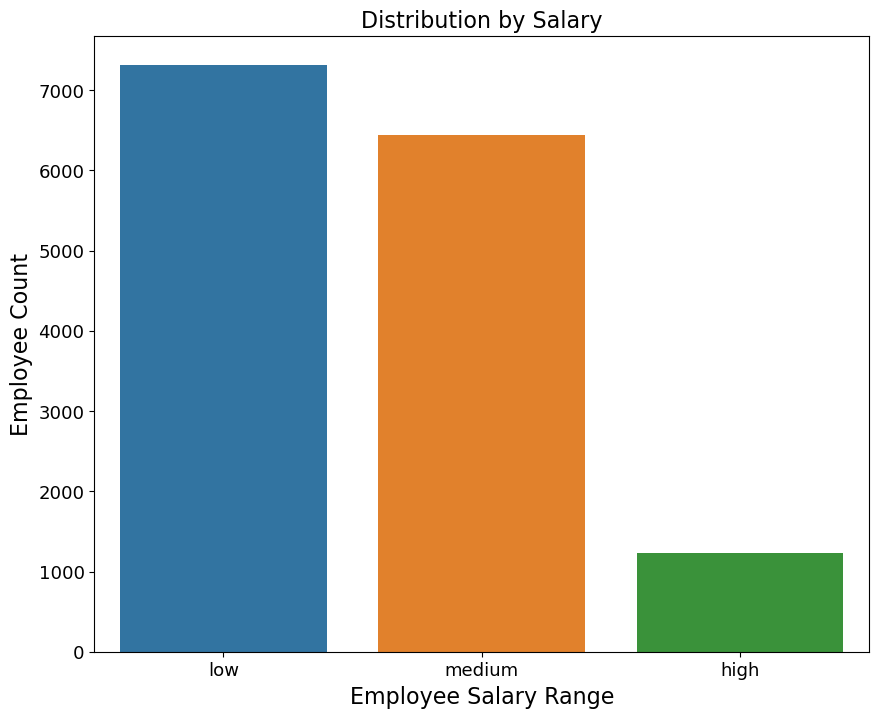

In [25]:
# distribution of salary

sns.countplot(data=data, x='salary')

plt.title('Distribution by Salary')
plt.xlabel('Employee Salary Range')
plt.ylabel('Employee Count')

plt.show()

- Empployees earning a low salary are high, and those earning a high salary are few

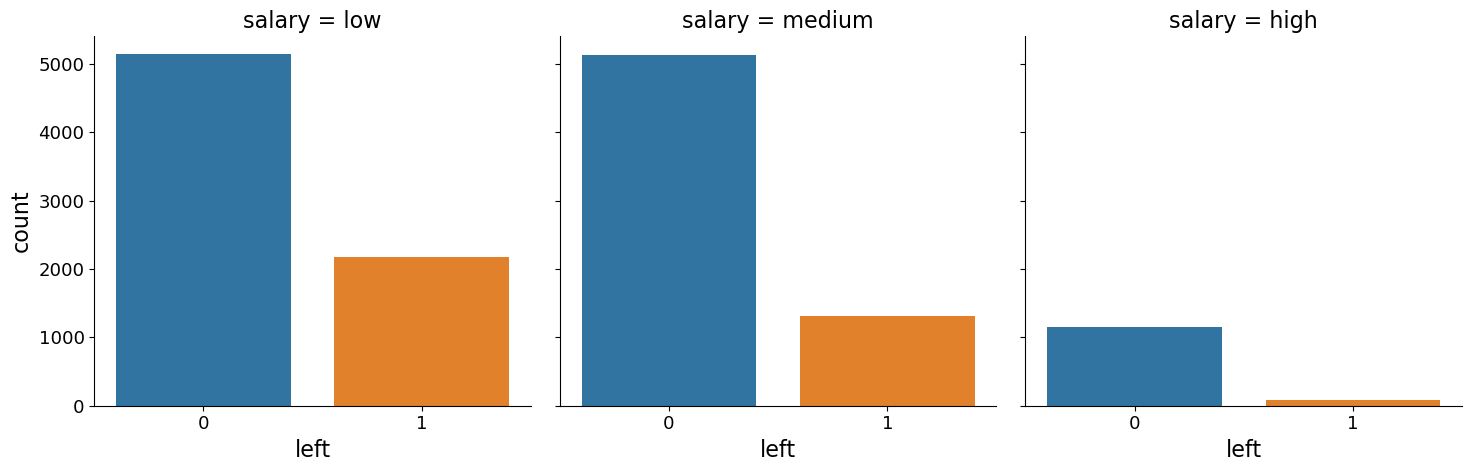

In [26]:
# checking distribution of employees by their salary, as by their employment status

sns.catplot(data=data, x='left', col='salary', kind='count')

plt.show()

- Low salaried employees have a higher churning rate, than  those with medium and high salary

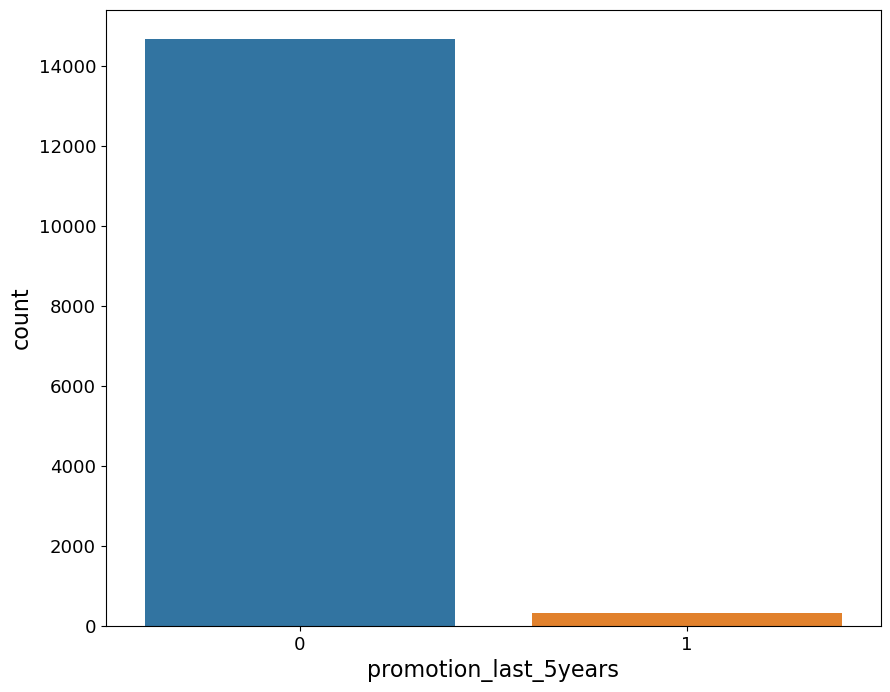

In [27]:
# checking distribution of those promoted in the last 5 years

sns.countplot(data=data, x='promotion_last_5years')

plt.show()

- Those who didnt get promoted are alot

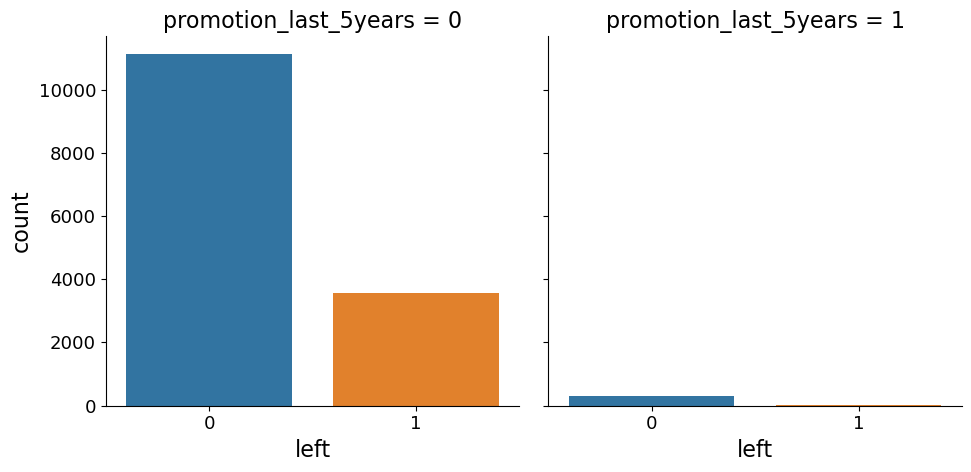

In [28]:
sns.catplot(data=data, x='left', col='promotion_last_5years', kind='count')

plt.show()

- People who did not get promoted has a high churning rate

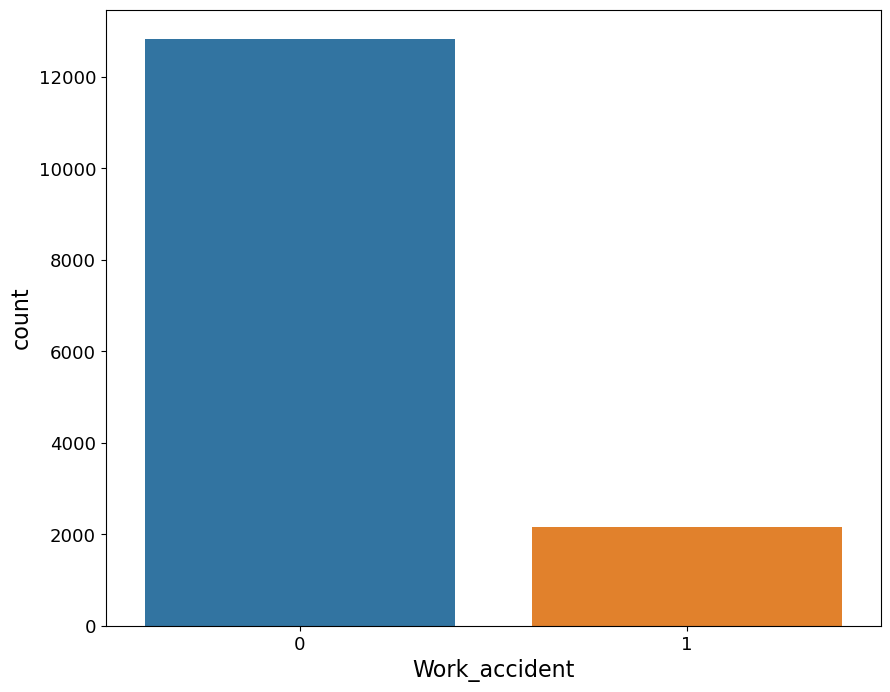

In [29]:
sns.countplot(data=data, x='Work_accident')

plt.show()

- Few people made work accidents

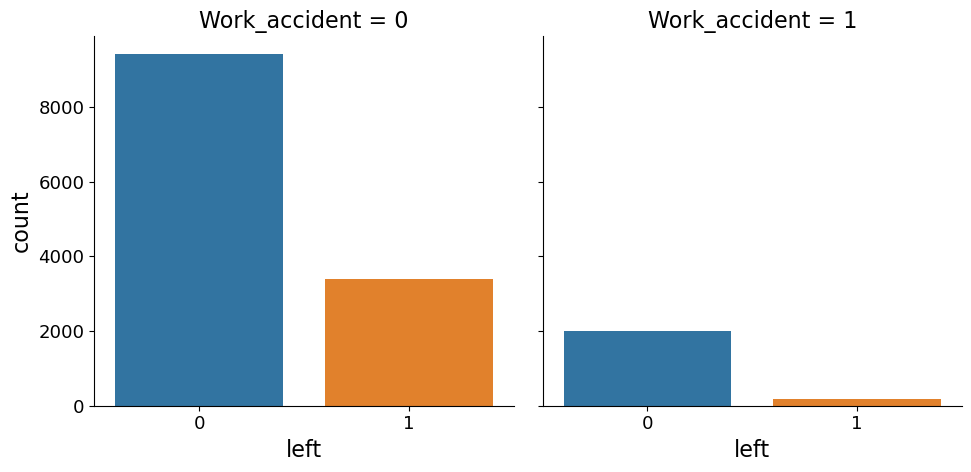

In [30]:
sns.catplot(data=data, x='left', col='Work_accident', kind='count')

plt.show()

- Most people that left are the ones who did not make any accidents at work

### NUmerical columns

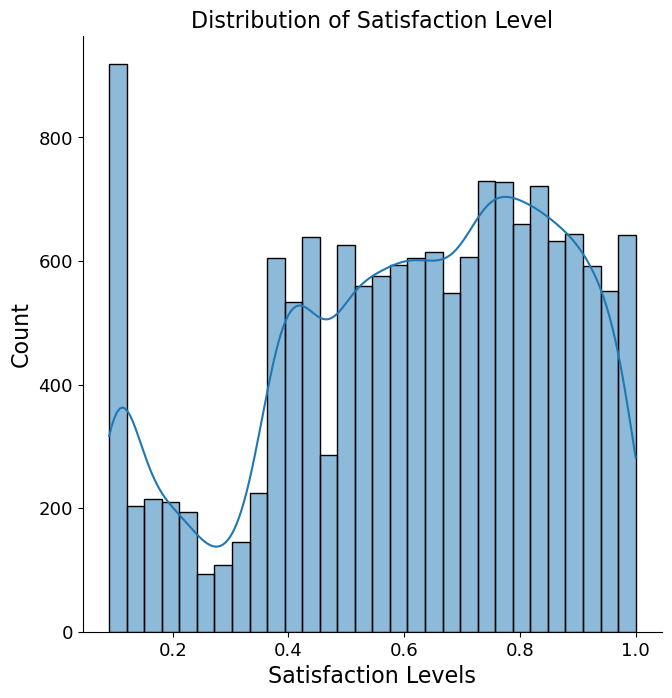

In [31]:
# checking distribution of `satisfaction_level` column

sns.displot(data=data, x='satisfaction_level', kde=True, height=7)

plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Levels')

plt.show()

- Is distributed from 0.1 to 1.
- Satisfaction level of 0.1 has the highest employee count

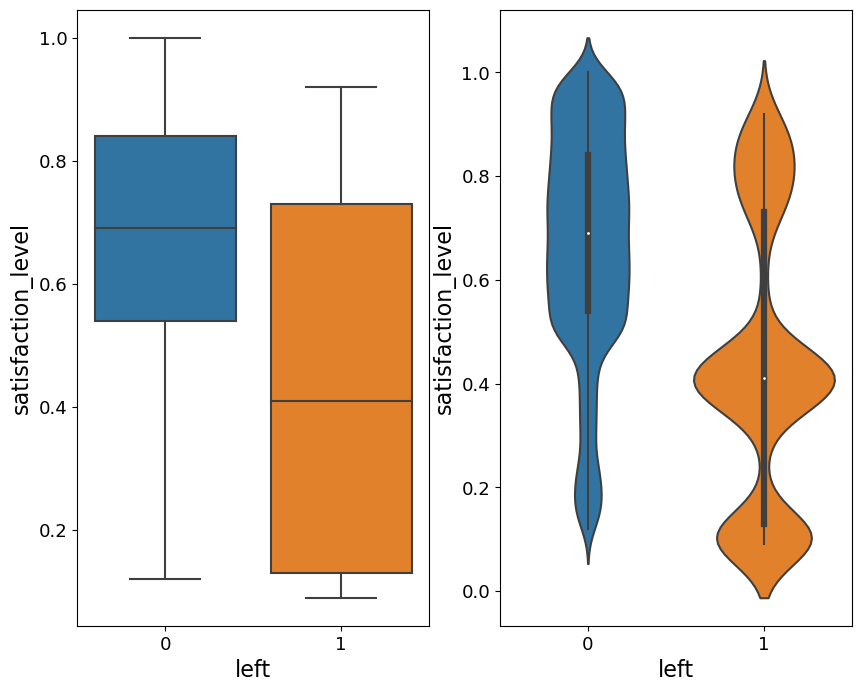

In [32]:
# checking distribution of employee satisfaction level to the employee status
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.boxplot(data=data, x='left', y='satisfaction_level', ax=axes[0])
sns.violinplot(data=data, x='left', y='satisfaction_level')

plt.subplots_adjust(hspace=0.4)

- Employees that left the most had low satisfaction levels that ranged from 0.2 to 0.5

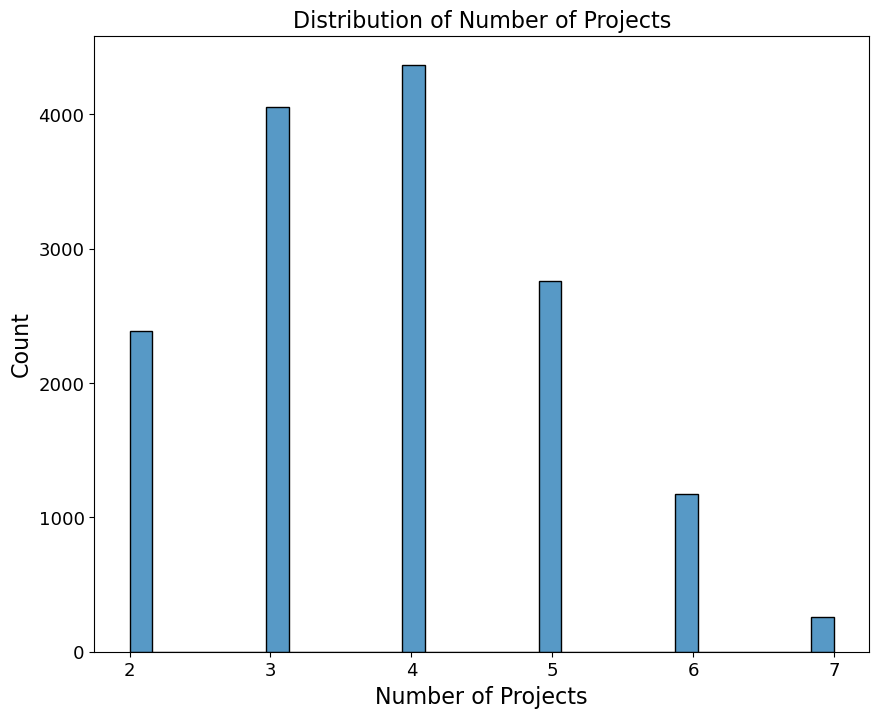

In [33]:
# checking the distribution of number of projects

sns.histplot(data=data, x='number_project')

plt.title('Distribution of Number of Projects')
plt.xlabel('Number of Projects');

- Employees handled between 2 to 7 projects
- Most employees handled 4 projects.
- Very few employees handled 7 projects

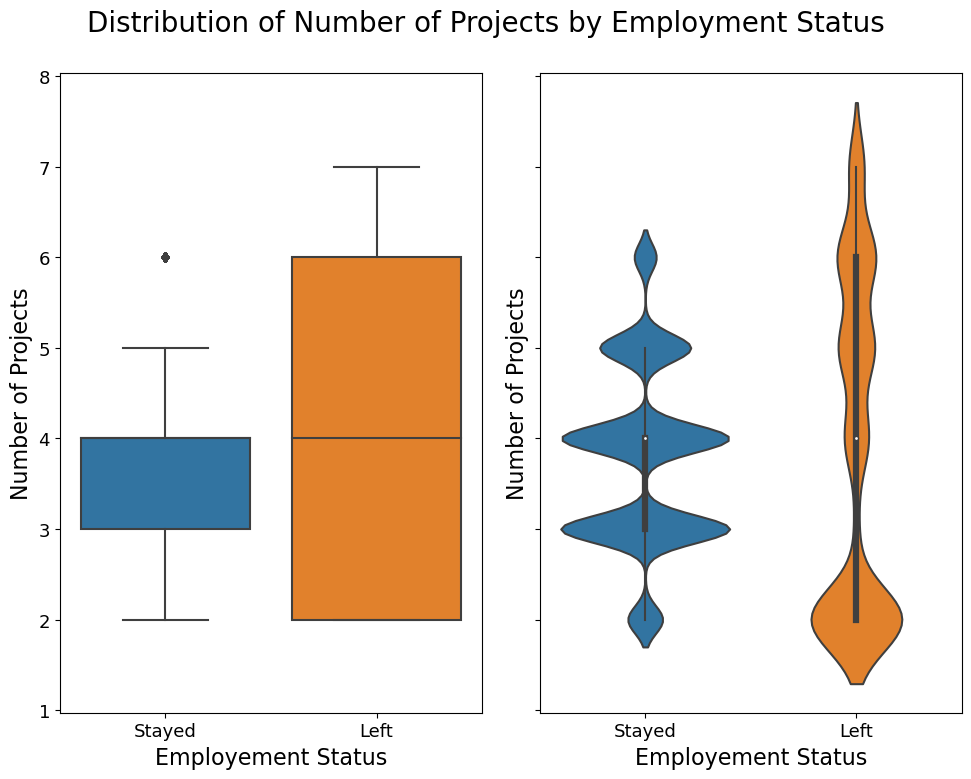

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.boxplot(data=data, x='left', y='number_project', ax=axes[0])
axes[0].set_xlabel('Employement Status')
axes[0].set_ylabel('Number of Projects')
axes[0].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

sns.violinplot(data=data, x='left' , y='number_project', ax=axes[1])
axes[1].set_xlabel('Employement Status')
axes[1].set_ylabel('Number of Projects')
axes[1].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

fig.suptitle('Distribution of Number of Projects by Employment Status')
plt.tight_layout();

- Most of the employees who left had 2 projects
- The employees who stayed has between 3 and 4 projects


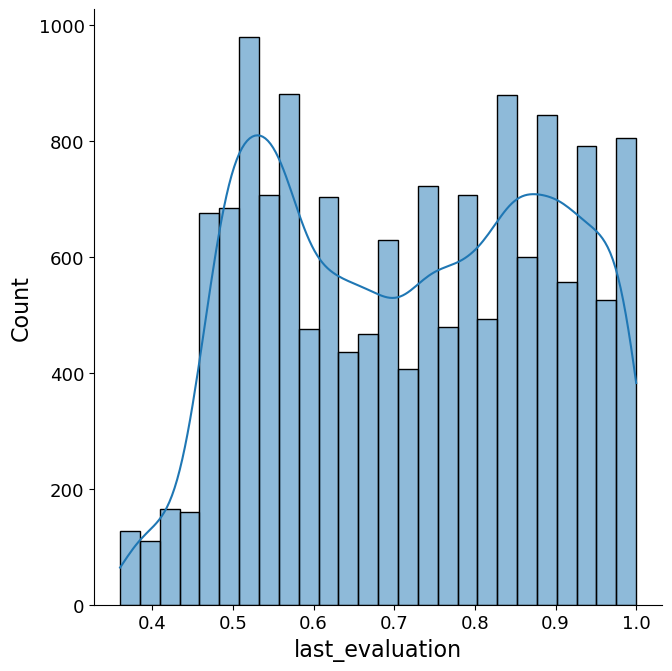

In [35]:
# checking distribution of last evaluations

sns.displot(data=data, x='last_evaluation', kde=True, height=7);

- The last evaluation values range from 0.35 to 1
- The evaluation that most employees got was 0.55


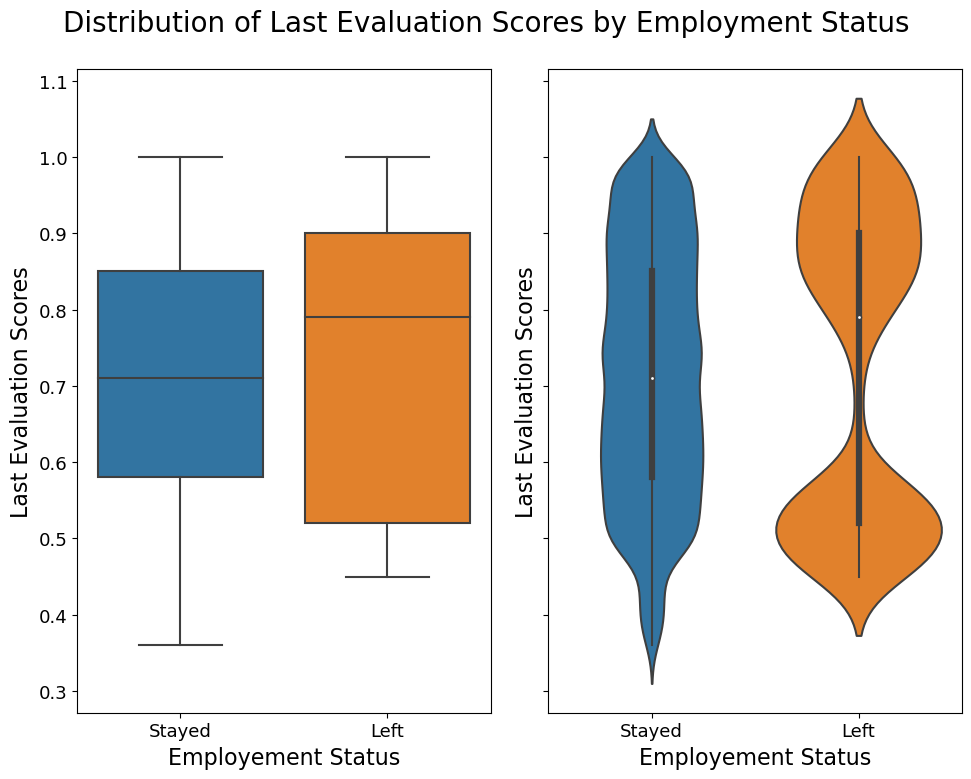

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.boxplot(data=data, x='left', y='last_evaluation', ax=axes[0])
axes[0].set_xlabel('Employement Status')
axes[0].set_ylabel('Last Evaluation Scores')
axes[0].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

sns.violinplot(data=data, x='left' , y='last_evaluation', ax=axes[1])
axes[1].set_xlabel('Employement Status')
axes[1].set_ylabel('Last Evaluation Scores')
axes[1].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

fig.suptitle('Distribution of Last Evaluation Scores by Employment Status')
plt.tight_layout();

- Most of the people who left had a last evaluation of about 0.5
- Also people with high evaluations also left in substanial numbers

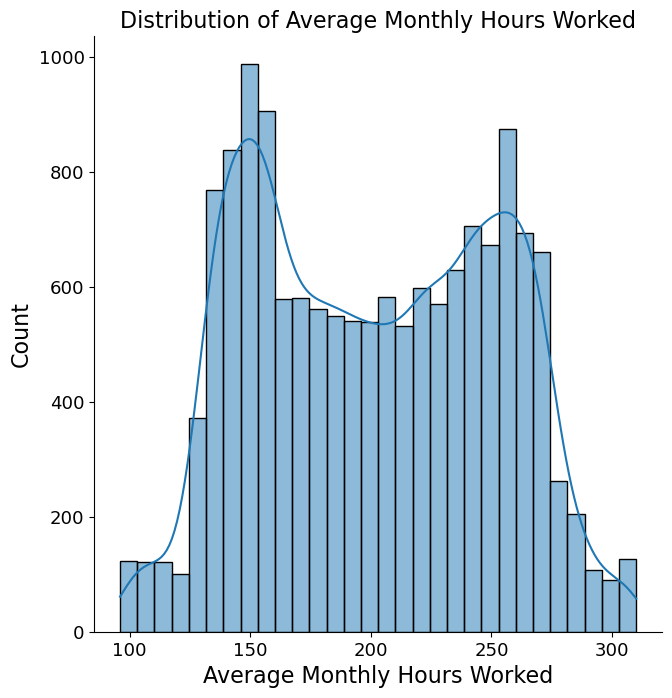

In [37]:
# checking distribution of `average_monthly_hours` column

sns.displot(data=data, x='average_montly_hours', kde=True, height=7)

plt.title('Distribution of Average Monthly Hours Worked')
plt.xlabel('Average Monthly Hours Worked');

- Average monthly hours worked ranged from 100 to 300 hours.
- Most employees worked 150 hours

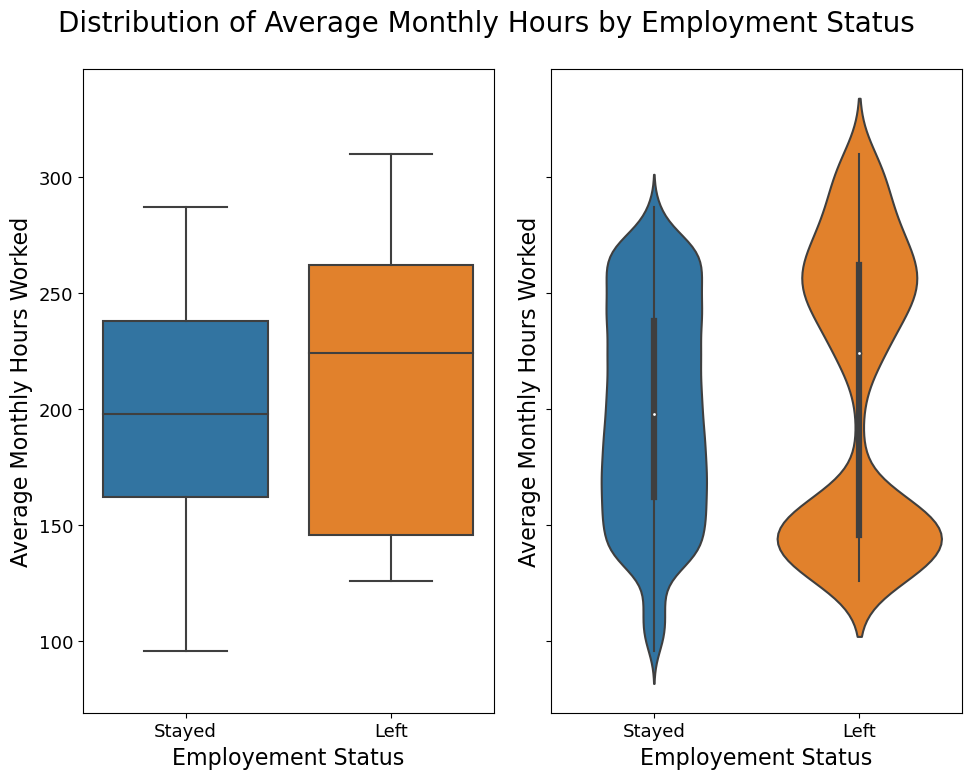

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.boxplot(data=data, x='left', y='average_montly_hours', ax=axes[0])
axes[0].set_xlabel('Employement Status')
axes[0].set_ylabel('Average Monthly Hours Worked')
axes[0].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

sns.violinplot(data=data, x='left' , y='average_montly_hours', ax=axes[1])
axes[1].set_xlabel('Employement Status')
axes[1].set_ylabel('Average Monthly Hours Worked')
axes[1].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

fig.suptitle('Distribution of Average Monthly Hours by Employment Status')
plt.tight_layout();

- The employees who left had woeked 150 and about 250 hours

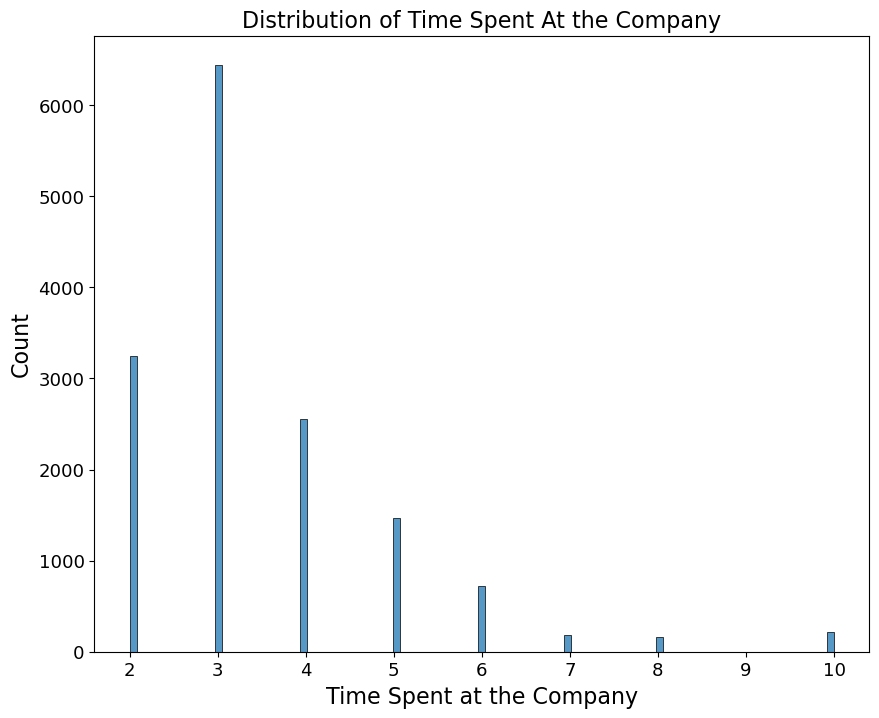

In [39]:
# checking distribution of `time_spend_company`

sns.histplot(data=data, x='time_spend_company')

plt.title('Distribution of Time Spent At the Company')
plt.xlabel('Time Spent at the Company');

- Time spent at the company ranges from 2 to 10 years
- Most of the employees have been at the company for 3 years

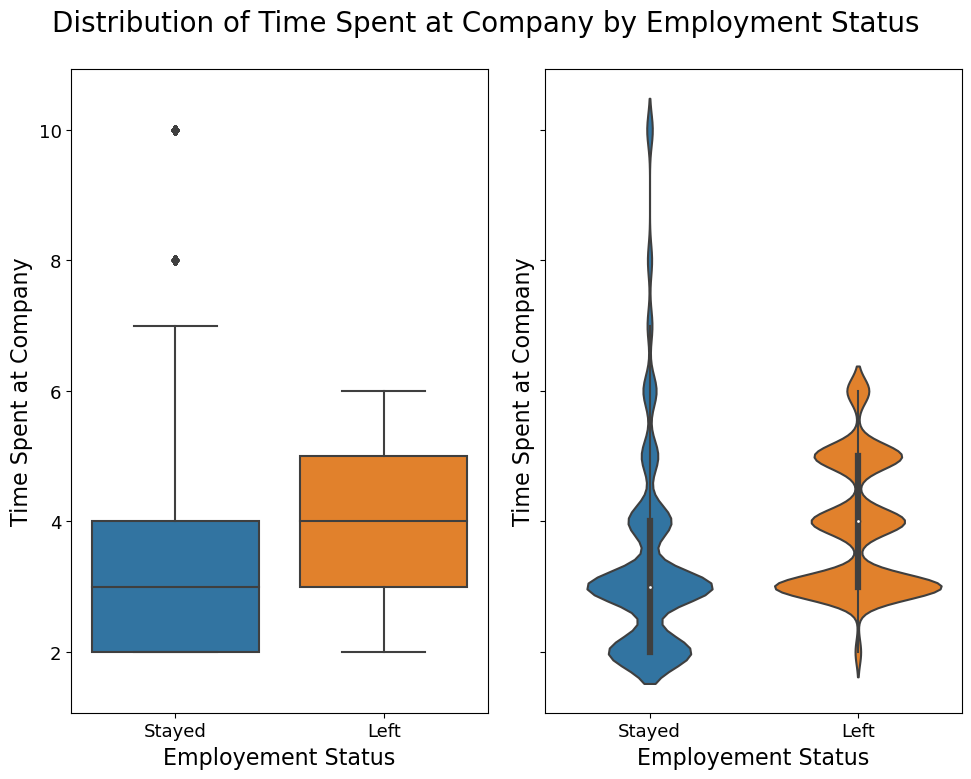

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.boxplot(data=data, x='left', y='time_spend_company', ax=axes[0])
axes[0].set_xlabel('Employement Status')
axes[0].set_ylabel('Time Spent at Company')
axes[0].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

sns.violinplot(data=data, x='left' , y='time_spend_company', ax=axes[1])
axes[1].set_xlabel('Employement Status')
axes[1].set_ylabel('Time Spent at Company')
axes[1].set_xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

fig.suptitle('Distribution of Time Spent at Company by Employment Status')
plt.tight_layout();

- Most employees who left had spent 3 years at the company. 
- The range of those who left the company are those who worked for 2 to 6 years. Those who worked from 6 to 10 years, none left the company

C:\Users\w.selen.KEEMBLT0011\AppData\Local\Temp\ipykernel_9276\3699985030.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


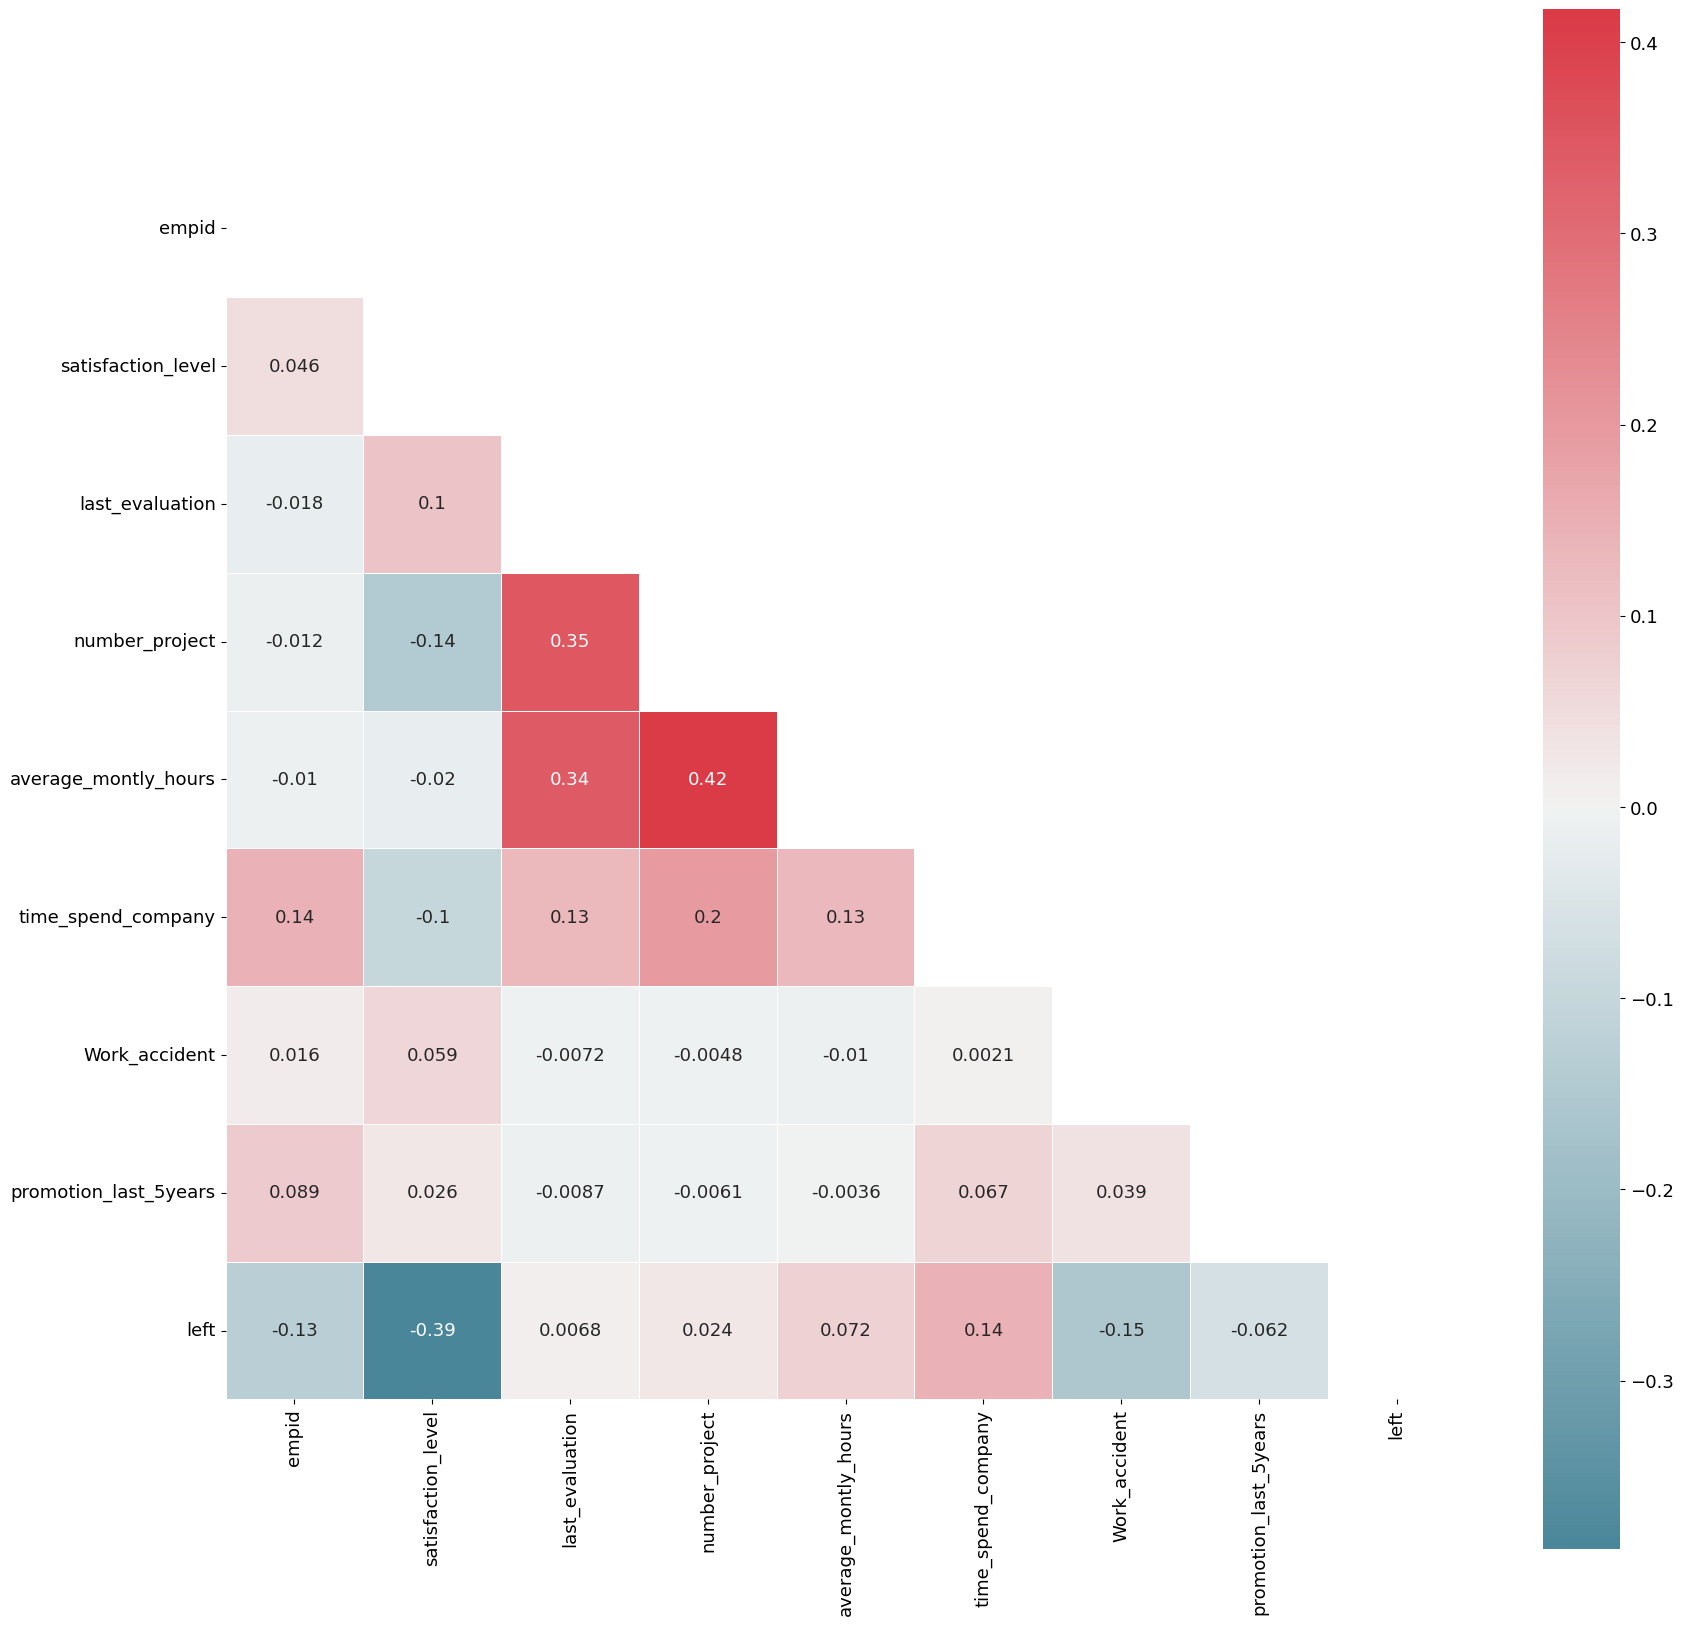

In [41]:
# checking the correlation between columns

correlation = data.corr()

# plotting the correlation

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)]=True

fig, ax = plt.subplots(figsize= (20,20))

# generating a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    data=correlation,
    mask=mask,
    cmap=cmap,
    square=True,
    annot=True,
    center=0,
    linewidths=0.5,
    annot_kws={"size": 13}
)

#fig.suptitle('Variables Correlations', fontsize=30, y=.95);
plt.show()

- The column with the highest correlation to the employment status is `satisfaction_level`. If the satisfaction level is low in an employee, there is a 39% chance that they will leave.

# 4. Modelling

## Feature Engineering

In [42]:
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


- It can be noted that the `empid` column is not needed for modelling, hence can be dropped.

In [43]:
# creating a copy of the data

df = data.copy()

In [44]:
# dropping the column

df.drop(columns=['empid'], inplace=True)



In [45]:
# previewing the new dataframe

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


- The `salary` column has an object data type. This needs to be converted to a numerical column.

In [46]:
# converting the `salary` column to category

df['salary'] = df['salary'].astype('category')

In [47]:
# insantiating label encoder

labelencod = LabelEncoder()

In [48]:
# encoding the `salary` column

df['salary'] =labelencod.fit_transform(df['salary'])

In [49]:
# previewing the dataframe

df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1


In [50]:
# converting the columns that are categorical to category data type

#df[['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] = df[['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years']].astype('category')

In [51]:
# checking the data types

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                     int32
left                       int64
dtype: object

##### Splitting data

In [52]:
# splitting into feature and target

X = df.drop(columns=['left'])
y = df['left']


In [53]:
# splitting into train, test and validation set

X_train, X_, y_train, y_ = train_test_split(X, 
                                            y, 
                                            test_size=0.3, 
                                            stratify=y, 
                                            random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_, 
                                                y_, 
                                                test_size=0.5, 
                                                stratify=y_, 
                                                random_state=42)

In [54]:
# checking the shape of the data

print(f'X_train shape is {X_train.shape} and y_train is {y_train.shape}')
print(f'X_test shape is {X_test.shape} and y_test is {y_test.shape}')
print(f'X_val shape is {X_val.shape} and y_val is {y_val.shape}')

X_train shape is (10497, 8) and y_train is (10497,)
X_test shape is (2250, 8) and y_test is (2250,)
X_val shape is (2250, 8) and y_val is (2250,)


### Model Selection

In [55]:
# creating parameters to be used

model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param': {
            'n_estimators' : [10, 50, 100, 130],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : range(2, 4, 1),
            'max_features' : ['sqrt', 'log2']
        }
    },
    'XGBClassifier' : {
        'model' : XGBClassifier(objective='binary:logistic'),
        'param': {
            'learning_rate' : [0.5, 0.1, 0.01, 0.001],
            'max_depth' : [3, 5, 10, 20],
            'n_estimators' : [10, 50, 100, 200]
        }
    }
}

In [56]:
for key, vals in model_param.items():
    print(vals['param'])

{'n_estimators': [10, 50, 100, 130], 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 4), 'max_features': ['sqrt', 'log2']}
{'learning_rate': [0.5, 0.1, 0.01, 0.001], 'max_depth': [3, 5, 10, 20], 'n_estimators': [10, 50, 100, 200]}


In [59]:
# performing grid search

scores = []
for model_name, mp in tqdm(model_param.items()):
    model_selection = GridSearchCV(estimator=mp['model'],
                                   param_grid=mp['param'],
                                   cv=5,
                                   return_train_score=False)
    model_selection.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : model_selection.best_score_,
        'best_params' : model_selection.best_params_
    })

100%|██████████| 2/2 [04:22<00:00, 131.49s/it]


In [64]:
# checking scores

scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9259201511614983,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9906649994442592,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}}]

In [76]:
# storing the scores in a dataframe

scores_df = pd.DataFrame(scores)
scores_df

,model,best_score,best_params
0,RandomForestClassifier,0.925920,"{'criterion': 'entropy', 'max_depth': 3, 'max_..."
1,XGBClassifier,0.990665,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


- XBGClassifier proved to be the best model, having a best score of 0.99 
- THis model will be used to build the model

### Model Building

In [96]:
# getting the optimum parameters

scores_df.loc[scores_df['model' ] == 'XGBClassifier', 'best_params'].values[1]

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

In [98]:
# insantiating the model

model_xgb = XGBClassifier(objective='binary:logistic',
                          learning_rate=0.1,
                          max_depth=10,
                          n_estimators=200)

In [99]:
# training model

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [100]:
# testing the model

model_xgb.score(X_test, y_test)

0.9875555555555555

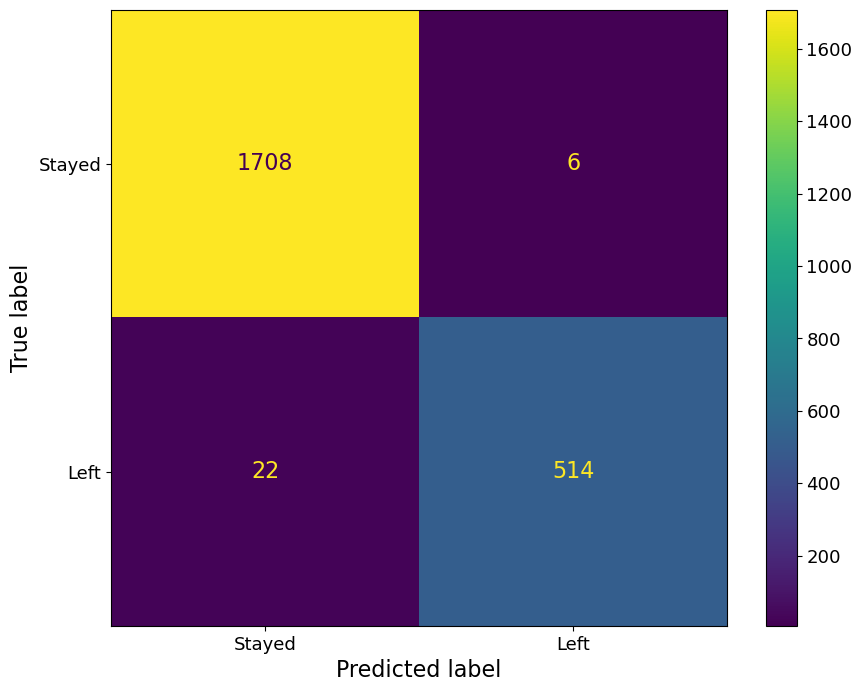

In [109]:
# plotting confusion matrix of test set

ConfusionMatrixDisplay.from_estimator(estimator=model_xgb, X=X_test, y=y_test, display_labels=['Stayed', 'Left']);

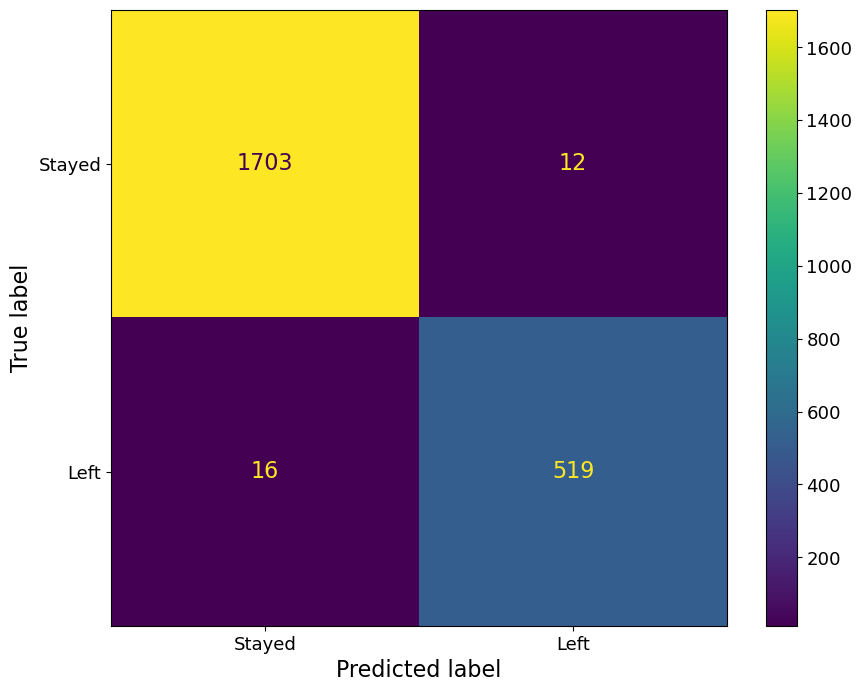

In [108]:
# plotting confusion matrix of validation set

ConfusionMatrixDisplay.from_estimator(estimator=model_xgb, X=X_val, y=y_val, display_labels=['Stayed', 'Left']);

# 5. Deployment